<a href="https://colab.research.google.com/github/yexf308/AppliedStatistics/blob/main/11_Ensemble_Methods.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%pylab inline 
import pandas as pd
from scipy import linalg
from itertools import combinations
import scipy

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


$\def\m#1{\mathbf{#1}}$
$\def\mm#1{\boldsymbol{#1}}$
$\def\mb#1{\mathbb{#1}}$
$\def\c#1{\mathcal{#1}}$
$\def\mr#1{\mathrm{#1}}$
$\newenvironment{rmat}{\left[\begin{array}{rrrrrrrrrrrrr}}{\end{array}\right]}$
$\newcommand\brm{\begin{rmat}}$
$\newcommand\erm{\end{rmat}}$
$\newenvironment{cmat}{\left[\begin{array}{ccccccccc}}{\end{array}\right]}$
$\newcommand\bcm{\begin{cmat}}$
$\newcommand\ecm{\end{cmat}}$


This notebook is based on Eric Eaton's slides

# Ensemble Learning
- Suppose you pose a complex question to thousands of random people, then aggregate
their answers. In many cases you will find that this aggregated answer is better than
an expert’s answer. This is called the **wisdom of the crowd**. S

- Similarly, if you aggregate
the predictions of a group of predictors (such as classifiers or regressors), you will
often get better predictions than with the best individual predictor. 

- A group of predictors is called an **ensemble**; thus, this technique is called **Ensemble Learning**, and an Ensemble Learning algorithm is called an **Ensemble method**.


Consider a set of classifiers $h_1, h_2,\dots, h_L$.
**Idea**: Construct a classifier $H(\mathbf{x})$ that combines the
individual decisions of $h_1, h_2, \dots, h_L$. 

- Could have the member classifiers vote, such as majority rule. 

- Could use different members for different regions of the
instance space (based on the performance). 

- Even if each classifier is a **weak learner**
(meaning it does only slightly better than random guessing), the ensemble can still be
a **strong learner** (achieving high accuracy), provided there are a sufficient number of
weak learners in the ensemble, and they are sufficiently diverse.

Successful ensembles require **diversity**,

- Classifiers should make different mistakes.

- Can have different types of base learners. 
- We should train the dataset using very different algorithms. 

## Voting classifiers
### 1. Combining Classifiers: Averaging
Simple majority rule/uniform averaging. 

<img src="https://github.com/yexf308/AppliedStatistics/blob/main/image/ensemble1.png?raw=true" width="400" />

### 2. Combining Classifiers: Weighted Average
Coefficients of individual members are trained using
a validation set. Or if all classifiers are able to estimate class probabilities, you can averaged over all the individual classifier by giving more weight to highly confident votes. 

<img src="https://github.com/yexf308/AppliedStatistics/blob/main/image/ensemble2.png?raw=true" width="400" />

### 3. Combining Classifiers: Gating
Coefficients of individual members depend on input and train gating function via validation set. 

<img src="./image/ensemble3.png" width="400" />

### 4. Combining Classifiers: Stacking

Predictions of 1st layer used as input to 2nd layer and train 2nd layer on validation set.
<img src="./image/ensemble4.png" width="400" />



In [2]:
from sklearn.datasets import make_moons
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

In [3]:
X, y = make_moons(n_samples=500, noise=0.30, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

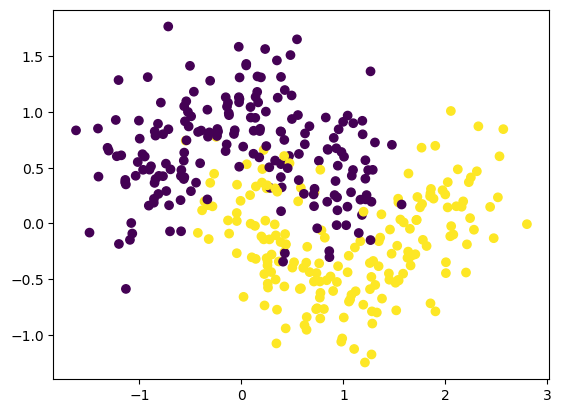

In [7]:
plt.scatter(X_train[:,0],X_train[:,1],c=y_train)
plt.show()

In [8]:
# approach 1: Hard voting
voting_clf = VotingClassifier(
estimators=[('lr', LogisticRegression(random_state=42)),
('rf', RandomForestClassifier(random_state=42)),
('svc', SVC(random_state=42))
]
)
voting_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('lr', LogisticRegression(random_state=42)),
                             ('rf', RandomForestClassifier(random_state=42)),
                             ('svc', SVC(random_state=42))])

In [9]:
for name, clf in voting_clf.named_estimators_.items():
    print(name, "=", clf.score(X_test, y_test))

lr = 0.864
rf = 0.896
svc = 0.896


In [10]:
voting_clf.predict(X_test[:1])

array([1])

In [11]:
[clf.predict(X_test[:1]) for clf in voting_clf.estimators_]

[array([1]), array([1]), array([0])]

In [12]:
voting_clf.score(X_test, y_test)

0.912

In [13]:
# approach 2: soft voting
voting_clf.voting = "soft"
voting_clf.named_estimators["svc"].probability = True
voting_clf.fit(X_train, y_train)
voting_clf.score(X_test, y_test)

0.92